In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Get all file names in current folder
files = os.listdir(".")

In [3]:
# Concatenate all dataframes in a single one
df = pd.concat([pd.read_csv(f) for f in files if f.endswith(".csv")])
df = df.drop(columns=["dataset"])

In [4]:
models = df["method"].unique()
models = ["fmgp", "valla", "lla last_layer full", "lla last_layer kron", "ella"]
labels = ["FMGP", "VaLLA", "LLA* (full)", "LLA* (kron)", "ELLA"]
print("Models: ", models)

Models:  ['fmgp', 'valla', 'lla last_layer full', 'lla last_layer kron', 'ella']


In [5]:
def std(x):
    return np.std(x)

In [6]:
# Group by "method" and "resnet" and compute average and std
df = df.groupby(["method"]).agg(["mean", std])
df

RMSE                 NLL                    Q-10  \
                         mean       std      mean           std      mean   
method                                                                      
ella                 9.954041  0.025602  3.731164  3.482152e-03  0.247599   
fmgp                 9.968822  0.000000  3.228530  4.440892e-16  0.138890   
lla last_layer full  9.968822  0.000000  3.718391  1.243423e-06  0.253173   
lla last_layer kron  9.968822  0.000000  3.718389  0.000000e+00  0.253177   
map                  9.968822  0.000000  3.874726  4.440892e-16  0.386225   
valla                9.968822  0.000000  3.274221  1.342554e-03  0.167023   

                                   Q-20                    Q-30            \
                          std      mean           std      mean       std   
method                                                                      
ella                 0.058371  0.470667  8.318958e-02  0.650891  0.067960   
fmgp                 0.000000  0.275332  0.000000e+00  0.408206  0.000000   
lla last_layer full  0.000000  0.474603  5.551115e-17  0.644883  0.000003   
lla last_layer kron  0.000000  0.474603  5.551115e-17  0.644896  0.000000   
map                  0.000000  0.661183  0.000000e+00  0.811082  0.000000   
valla                0.000679  0.330241  1.173402e-03  0.485513  0.001635   

                     ...    train_time                test_time             \
                     ...          mean          std        mean        std   
method               ...                                                     
ella                 ...   4039.813925  1740.277734  162.805428  83.582283   
fmgp                 ...   1093.468839     1.268945   24.567536   0.115632   
lla last_layer full  ...    113.705992    16.300955   32.573121   3.965940   
lla last_layer kron  ...    256.663904    17.980705   36.386006   2.696442   
map                  ...    145.052943     2.957899   12.901331   0.405237   
valla                ...  26743.630944  1459.763658  907.962148  43.051660   

                    seed           sigma_noise               prior_precision  \
                    mean       std        mean           std            mean   
method                                                                         
ella                 2.5  1.118034    0.500000  0.000000e+00        0.010000   
fmgp                 2.0  1.414214         NaN           NaN             NaN   
lla last_layer full  2.0  1.414214    0.446608  9.782065e-07        9.670001   
lla last_layer kron  2.0  1.414214    0.446610  0.000000e+00        2.422839   
map                  2.0  1.414214    0.500000  0.000000e+00             NaN   
valla                2.0  1.414214         NaN           NaN             NaN   

                               
                          std  
method                         
ella                 0.000000  
fmgp                      NaN  
lla last_layer full  0.281432  
lla last_layer kron  0.000000  
map                       NaN  
valla                     NaN  

[6 rows x 36 columns]

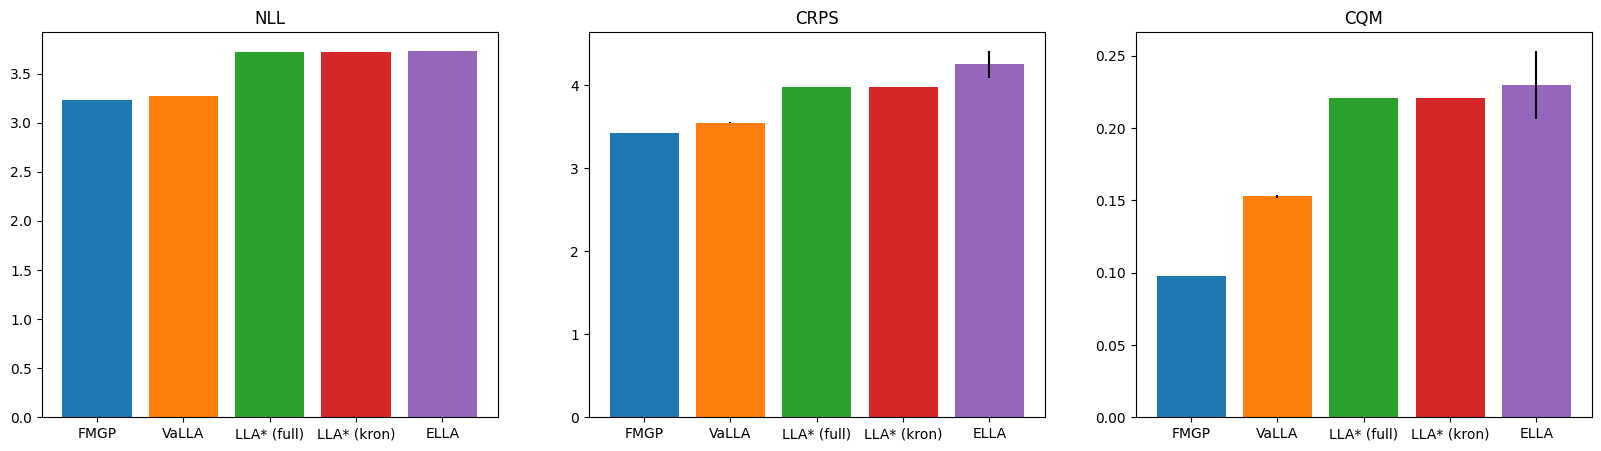

In [7]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
# Plot NLL in axis 0
for j, model in enumerate(models):
    nll = df.loc[model, ("NLL", "mean")]
    std = df.loc[model, ("NLL", "std")]
    axis[0].bar(j, nll, yerr=std, label=labels[j], color=f"C{j}")
    axis[0].set_title("NLL")
    axis[0].set_xticks(range(len(models)))
    axis[0].set_xticklabels(labels)

    # Plot CRPS
    crps = df.loc[model, ("CRPS", "mean")]
    std = df.loc[model, ("CRPS", "std")]
    axis[1].bar(j, crps, yerr=std, label=labels[j], color=f"C{j}")
    axis[1].set_title("CRPS")
    axis[1].set_xticks(range(len(models)))
    axis[1].set_xticklabels(labels)

    # Plot Q
    q = df.loc[model, ("CQM", "mean")]
    std = df.loc[model, ("CQM", "std")]
    axis[2].bar(j, q, yerr=std, label=labels[j], color=f"C{j}")
    axis[2].set_title("CQM")
    axis[2].set_xticks(range(len(models)))
    axis[2].set_xticklabels(labels)

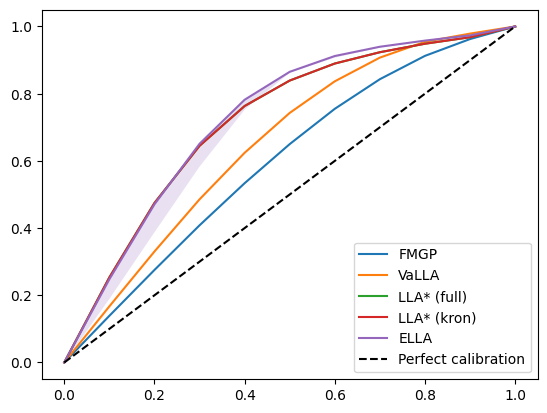

In [8]:
# Get Q-10, Q-20.. columns in array
for i, model in enumerate(models):
    Q = []
    Q_std = []
    for q in range(10, 100, 10):
        q = f"Q-{q}"
        q_values = df.loc[model, (q, "mean")]
        Q.append(q_values)
        q_std = df.loc[model, (q, "std")]
        Q_std.append(q_std)
    plt.plot(np.arange(0, 1.1, 0.1), [0, *Q, 1], label=labels[i])
    plt.fill_between(
        np.arange(0, 1.1, 0.1),
        [0, *Q, 1],
        [0, *(np.array(Q) - np.array(Q_std)), 1],
        alpha=0.2,
    )
plt.plot(
    np.arange(0, 1.1, 0.1),
    np.arange(0, 1.1, 0.1),
    label="Perfect calibration",
    linestyle="--",
    color="black",
)
plt.legend()

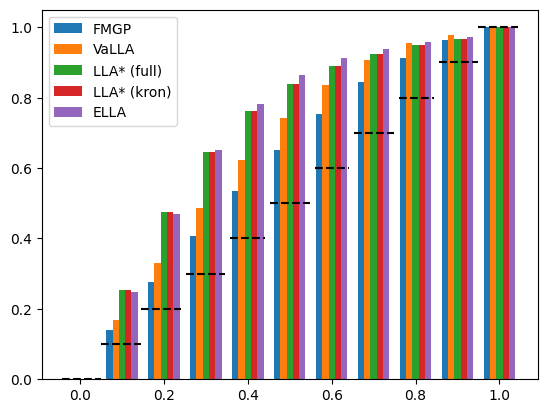

In [9]:
# Get Q-10, Q-20.. columns in array
sep = 0.015
er = np.arange(-2, 3, 1) * sep
for i, model in enumerate(models):
    Q = []
    Q_std = []
    for q in range(10, 100, 10):
        q = f"Q-{q}"
        q_values = df.loc[model, (q, "mean")]
        Q.append(q_values)
        q_std = df.loc[model, (q, "std")]
        Q_std.append(q_std)
    b = plt.bar(np.arange(0, 1.1, 0.1) + er[i], [0, *Q, 1], width=sep, label=labels[i])
plt.axhline(0.0, 0.04, 0.12, linestyle="--", color="black")
plt.axhline(0.1, 0.12, 0.20, linestyle="--", color="black")
plt.axhline(0.2, 0.2, 0.28, linestyle="--", color="black")
plt.axhline(0.3, 0.29, 0.37, linestyle="--", color="black")
plt.axhline(0.4, 0.38, 0.45, linestyle="--", color="black")
plt.axhline(0.5, 0.46, 0.54, linestyle="--", color="black")
plt.axhline(0.6, 0.55, 0.62, linestyle="--", color="black")
plt.axhline(0.7, 0.63, 0.71, linestyle="--", color="black")
plt.axhline(0.8, 0.72, 0.79, linestyle="--", color="black")
plt.axhline(0.9, 0.80, 0.88, linestyle="--", color="black")
plt.axhline(1.0, 0.88, 0.96, linestyle="--", color="black")

plt.legend()

In [10]:
# Concatenate all dataframes in a single one
nll = []
crps = []
Q = []
for i in range(5):
    nll.append(np.loadtxt(f"ella_{i}_nll.txt"))
    crps.append(np.loadtxt(f"ella_{i}_crps.txt"))
    Q.append(np.loadtxt(f"ella_{i}_cqm.txt"))
nll = np.array(nll)
crps = np.array(crps)
Q = np.array(Q)

nll_mean = np.mean(nll, axis=0)
nll_std = np.std(nll, axis=0) / np.sqrt(5)
crps_mean = np.mean(crps, axis=0)
crps_std = np.std(crps, axis=0) / np.sqrt(5)
Q_mean = np.mean(Q, axis=0)
Q_std = np.std(Q, axis=0) / np.sqrt(5)

In [11]:
evaluations = np.loadtxt("ella_0_evaluations.txt")

ValueError: x and y must have same first dimension, but have shapes (100,) and (99,)

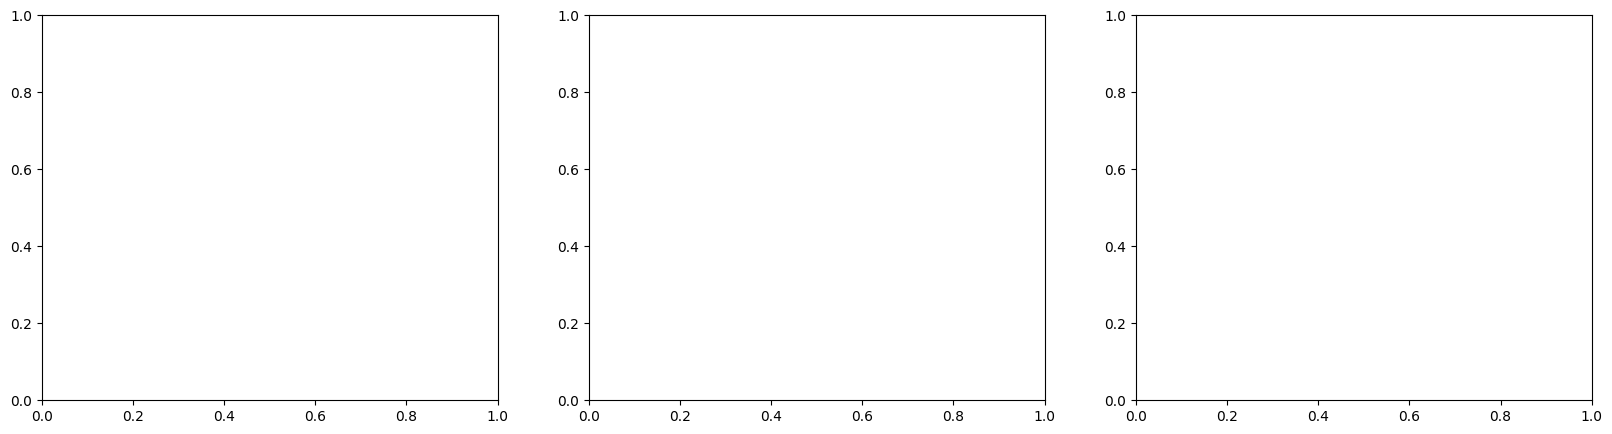

In [12]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
axis[0].plot(evaluations[1:], nll_mean[1:])
axis[0].set_title("NLL")

axis[1].plot(evaluations[1:], crps_mean[1:])
axis[1].set_title("CRPS")

axis[2].plot(evaluations[1:], Q_mean[1:])
axis[2].set_title("Q")

plt.show()